In [1]:
import seaborn as sns
import pandas as pd

# Загрузка датасета
tips = sns.load_dataset('tips')
# Просмотр первых нескольких строк
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
import numpy as np

# Коэффициент корреляции Пирсона
corr_coeff = tips['total_bill'].corr(tips['tip'])
print(f"Коэффициент корреляции Пирсона между total_bill и tip: {corr_coeff:.4f}")


Коэффициент корреляции Пирсона между total_bill и tip: 0.6757


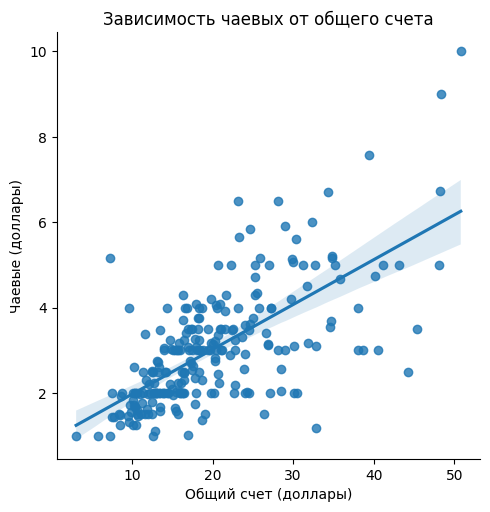

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Построение диаграммы рассеяния с линией регрессии
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.title('Зависимость чаевых от общего счета')
plt.xlabel('Общий счет (доллары)')
plt.ylabel('Чаевые (доллары)')
plt.show()


In [5]:
from sklearn.metrics import r2_score

# Подготовка данных
X = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Предсказания
y_pred = model.predict(X)

# Вычисление R^2
r_squared = r2_score(y, y_pred)
print(f"Коэффициент детерминации R^2: {r_squared:.4f}")


Коэффициент детерминации R^2: 0.4566


In [6]:
# Размер выборки
sample_size = int(len(tips) / 3)

# Случайная выборка
random_sample = tips.sample(n=sample_size, random_state=42)
print(f"Размер случайной выборки: {len(random_sample)}")


Размер случайной выборки: 81


In [7]:
# Стратифицированная выборка (выборка по дню)
stratified_sample = tips.groupby('day', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))
print(f"Размер стратифицированной выборки: {len(stratified_sample)}")


Размер стратифицированной выборки: 81


<ipython-input-7-8d1079333eb4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = tips.groupby('day', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))
<ipython-input-7-8d1079333eb4>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = tips.groupby('day', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))


In [8]:
population_mean = tips['tip'].mean()
print(f"Среднее значение чаевых в генеральной совокупности: {population_mean:.4f}")


Среднее значение чаевых в генеральной совокупности: 2.9983


In [9]:
random_sample_mean = random_sample['tip'].mean()
stratified_sample_mean = stratified_sample['tip'].mean()

print(f"Среднее значение чаевых в случайной выборке: {random_sample_mean:.4f}")
print(f"Среднее значение чаевых в стратифицированной выборке: {stratified_sample_mean:.4f}")


Среднее значение чаевых в случайной выборке: 2.8368
Среднее значение чаевых в стратифицированной выборке: 3.0606


In [10]:
import scipy.stats as stats

def confidence_interval(data, confidence):
    n = len(data)
    mean = data.mean()
    sem = stats.sem(data)  # Стандартная ошибка среднего
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - h, mean + h

conf_levels = [0.90, 0.95, 0.99]
samples = {'Генеральная совокупность': tips['tip'], 'Случайная выборка': random_sample['tip'], 'Стратифицированная выборка': stratified_sample['tip']}

for name, data in samples.items():
    print(f"\n{name}:")
    for conf in conf_levels:
        lower, upper = confidence_interval(data, conf)
        print(f"Доверительный интервал ({int(conf*100)}%): [{lower:.4f}, {upper:.4f}]")



Генеральная совокупность:
Доверительный интервал (90%): [2.8520, 3.1445]
Доверительный интервал (95%): [2.8238, 3.1728]
Доверительный интервал (99%): [2.7683, 3.2282]

Случайная выборка:
Доверительный интервал (90%): [2.6249, 3.0487]
Доверительный интервал (95%): [2.5834, 3.0902]
Доверительный интервал (99%): [2.5008, 3.1728]

Стратифицированная выборка:
Доверительный интервал (90%): [2.7755, 3.3458]
Доверительный интервал (95%): [2.7196, 3.4016]
Доверительный интервал (99%): [2.6085, 3.5128]
